In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [9]:
#读取数据
df = pd.read_excel('work.xlsx')
df  # data frame
df.head()
print(df)

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
# 按照时间升序排列
df.sort_values(by=['date'], inplace=True, ascending=True)
df.tail()

        date  proportion   pay    work
0 2019-01-01    0.002900  7750  0.0396
1 2018-01-01    0.002100  7114  0.0446
2 2017-01-01    0.001000  7053  0.0513
3 2016-01-01    0.000317  6985  0.0436


,proportion,pay,work
date,,,
2016-01-01,0.000317,6985,0.0436
2017-01-01,0.001000,7053,0.0513
2018-01-01,0.002100,7114,0.0446
2019-01-01,0.002900,7750,0.0396


In [3]:
X = df[['proportion', 'pay']]
y = df['work'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

X_normalizer = StandardScaler() # N(0,1)
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train, y_train.ravel())
#Now we can predict prices:
y_pred = knn.predict(X_test)
y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)

x1=[[0.000317,6985]]
print(knn.predict(x1))

[1.77635684e-15]


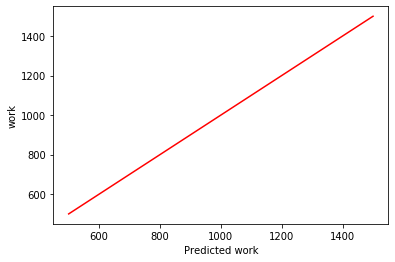

[0.0416 0.0416]


In [4]:

# Now add the perfect prediction line
diagonal = np.linspace(500, 1500, 100)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('Predicted work')
plt.ylabel('work')
plt.show()
print(y_pred_inv)


In [5]:
pred = knn.predict(X_test)
pred

array([1.77635684e-15, 1.77635684e-15])

In [6]:
X = df['proportion'].values.reshape(-1,1)
y = df['work'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print('a = {:.5}'.format(reg.coef_[0][0]))
print('b = {:.5}'.format(reg.intercept_[0]))

print("线性模型为: Y = {:.5}X + {:.5} ".format(reg.coef_[0][0], reg.intercept_[0]))


a = -2.3378
b = 0.048467
线性模型为: Y = -2.3378X + 0.048467 


[[0.04379126]]


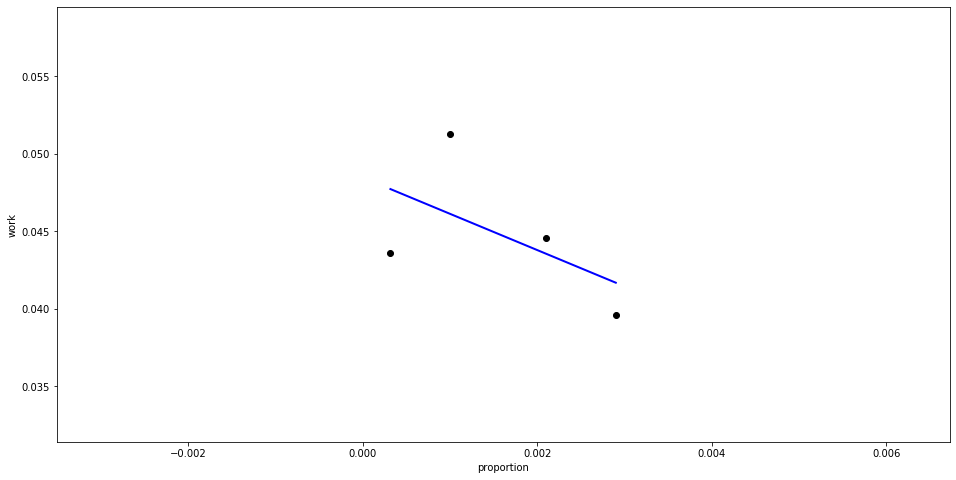

In [7]:
predictions = reg.predict(X)
x1=[[0.002]]
print(reg.predict(x1))

plt.figure(figsize=(16, 8))
plt.scatter(df['proportion'], df['work'], c ='black')
plt.plot(df['proportion'], predictions,c ='blue', linewidth=2)
plt.xlabel("proportion")
plt.ylabel("work")
plt.show()